In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
plt.rc("font",family=font_name)

import matplotlib as mlp
mlp.rcParams['axes.unicode_minus'] = False

import seaborn as sns

plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

# 서울시 공공 자전거 대여 분석

In [2]:
bike = pd.read_csv('data/SeoulBikeData.csv')
bike.head(10)

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes
5,01/12/2017,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,Winter,No Holiday,Yes
6,01/12/2017,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes
7,01/12/2017,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,Winter,No Holiday,Yes
8,01/12/2017,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Yes
9,01/12/2017,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,Winter,No Holiday,Yes


#### 2) 시간대별로 평균 몇대가 대여 되었나?

In [11]:
import pandas as pd

bike.groupby('Hour')['Rented Bike Count'].mean()


Hour
0      541.460274
1      426.183562
2      301.630137
3      203.331507
4      132.591781
5      139.082192
6      287.564384
7      606.005479
8     1015.701370
9      645.983562
10     527.821918
11     600.852055
12     699.441096
13     733.246575
14     758.824658
15     829.186301
16     930.621918
17    1138.509589
18    1502.926027
19    1195.147945
20    1068.964384
21    1031.449315
22     922.797260
23     671.126027
Name: Rented Bike Count, dtype: float64

#### 3) 위의 결과 시각화

Text(16, 150, '퇴근')

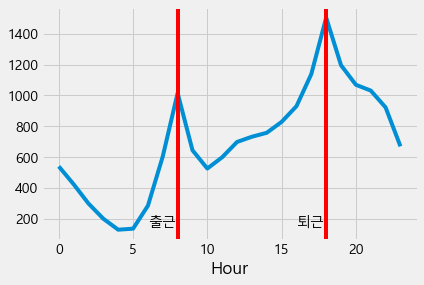

In [18]:
bike.groupby('Hour')['Rented Bike Count'].mean().plot()

plt.axvline(x=8,color="r")
plt.axvline(x=18,color="r")
plt.text(6, 150, '출근')
plt.text(16, 150, '퇴근')


#### 4) 2016년 1월 1일 금요일이었다. Date변수에서 요일을 뽑아서 파생변수(weekdays) 만들기

In [21]:
bike.loc[:,'Date'] = pd.to_datetime(bike['Date'], format= '%d/%m/%Y')
new = (bike['Date'] - pd.to_datetime('2016-01-01')).astype(str)

new = new.str.split(" ", expand=True)[0].astype(int)

def weekdays(x):
    if x%7 == 0 :
        return '금요일'
    elif x%7 == 1:
        return '토요일'
    elif x%7 == 2:
        return '일요일'
    elif x%7 == 3:
        return '월요일'
    elif x%7 == 4:
        return '화요일'
    elif x%7 == 5:
        return '수요일'
    elif x%7 == 6:
        return '목요일'

bike['weekdays'] = new.apply(weekdays)

bike.sample(10)

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,weekdays
2449,2018-03-13,231,1,5.9,65,1.0,596,-0.1,0.00,0.0,0.0,Spring,No Holiday,Yes,화요일
5994,2018-08-07,2274,18,34.6,50,3.1,1821,22.6,1.00,0.0,0.0,Summer,No Holiday,Yes,화요일
6762,2018-09-08,2255,18,25.7,38,1.5,2000,10.3,0.64,0.0,0.0,Autumn,No Holiday,Yes,토요일
5420,2018-07-14,2023,20,29.2,63,1.7,1988,21.4,0.10,0.0,0.0,Summer,No Holiday,Yes,토요일
635,2017-12-27,213,11,-6.8,28,2.1,1986,-22.3,0.88,0.0,0.0,Winter,No Holiday,Yes,수요일
542,2017-12-23,405,14,8.6,63,1.6,263,1.9,0.72,0.0,0.0,Winter,No Holiday,Yes,토요일
4899,2018-06-23,540,3,22.0,42,0.2,1891,8.4,0.00,0.0,0.0,Summer,No Holiday,Yes,토요일
7889,2018-10-25,1961,17,19.2,36,0.7,1643,3.7,0.38,0.0,0.0,Autumn,No Holiday,Yes,목요일
2494,2018-03-14,983,22,16.2,71,2.0,1780,10.9,0.00,0.0,0.0,Spring,No Holiday,Yes,수요일
2669,2018-03-22,81,5,1.1,88,0.9,927,-0.6,0.00,0.0,0.0,Spring,No Holiday,Yes,목요일


In [24]:
bike['weekdays'] = ((pd.to_datetime(bike['Date']) - pd.to_datetime('2016-01-01')).dt.days)%7

bike['weekdays'] = bike['weekdays'].map({0 : 'FRI',
                                         1 : 'SAT',
                                         2 : 'SUN',
                                         3 : 'MON',
                                         4 : 'TUE',
                                         5 : 'WED',
                                         6 : 'THU'}) 

#### 5) 요일별로 평균 몇 대가 대여되었을까?

In [25]:
bike.groupby('weekdays')['Rented Bike Count'].mean()

weekdays
FRI    747.117925
MON    730.563301
SAT    709.528846
SUN    625.155449
THU    690.704327
TUE    687.977564
WED    740.349359
Name: Rented Bike Count, dtype: float64

#### 6) 위의 결과를 막대 그래프로 시각화

<AxesSubplot:xlabel='weekdays', ylabel='Rented Bike Count'>

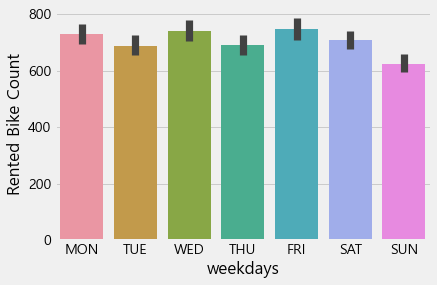

In [27]:
sns.barplot(x='weekdays',y='Rented Bike Count',data=bike,
           order=['MON','TUE','WED','THU','FRI','SAT','SUN'])

#### 7) 요일별 시간대별로 시각화

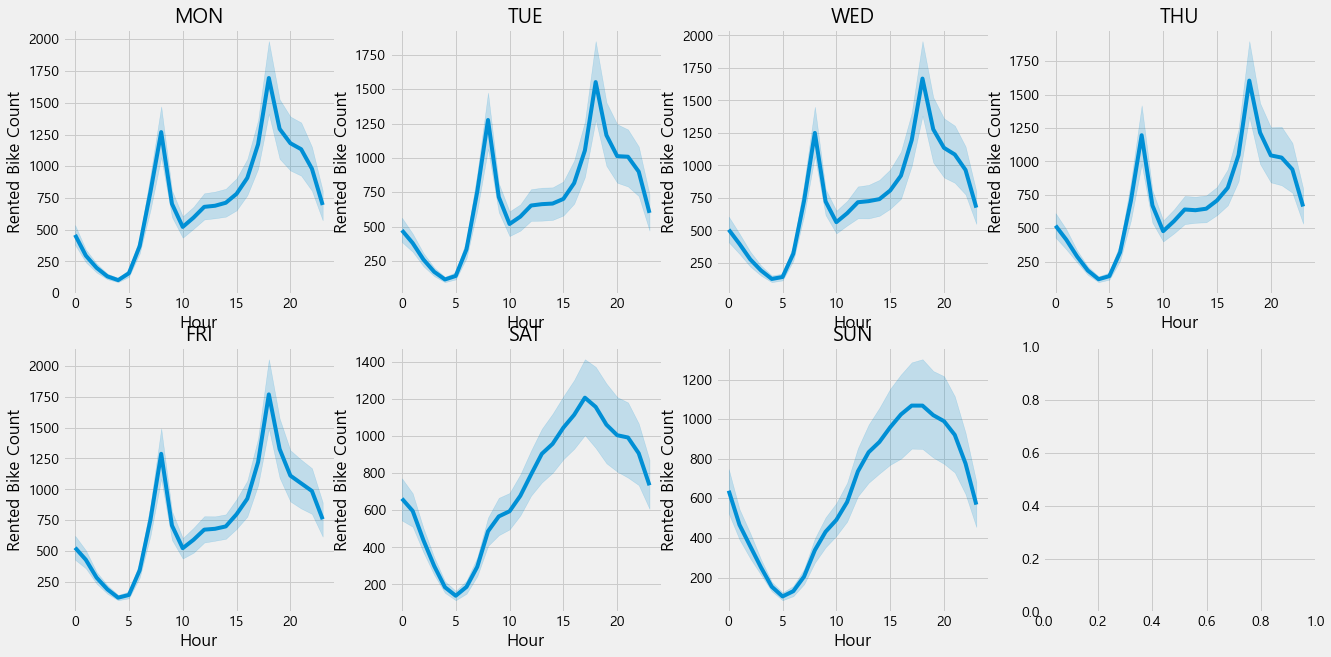

In [37]:
f,ax=plt.subplots(2,4,figsize=(20,10)) 

weekdays_list = ['MON','TUE','WED','THU','FRI','SAT','SUN']

for i in range(7):
    sns.lineplot('Hour','Rented Bike Count',
                 data=bike.loc[bike['weekdays']==weekdays_list[i]],
                ax=ax[i//4,i%4])
    
    ax[i//4,i%4].set_title(weekdays_list[i])